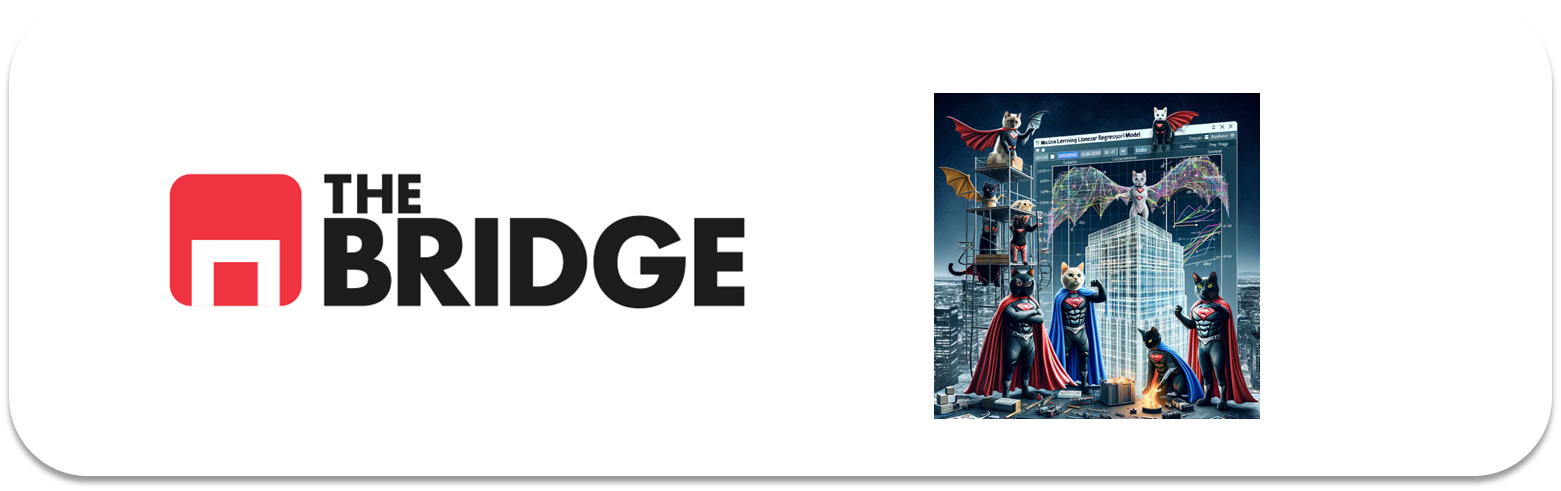

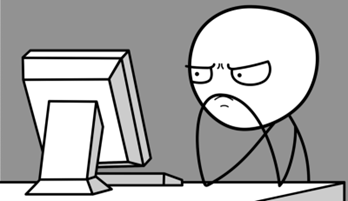

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logística para clasificación binaria**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Inicio: Entendiendo el problema

En este caso el objetivo de los ejercicios es hacer un modelado de regresión logística sobre el dataset conocidos como "Adults" o "Census Income" que permita casificar a las personas en si ganan más de 50K dolalres o no, en función de una serie de características demográficas y de empleo. Sigue las instrucciones cuando sea necesario para poder continuar

El nombre de las columnas y sus valores se muestra a continuación (las columnas siguen el mismo orden que en el fichero, por si tuvieras que utilizar estos nombres)

age: edad, continuous.  

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  

fnlwgt: continuous (a eliminar)  

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  

education-num: continuous.  

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  

sex: Female, Male.  

capital-gain: continuous.  

capital-loss: continuous.  

hours-per-week: continuous.  

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, confusion_matrix, roc_curve, auc

### Ejercicio 1: Carga de datos y vistazo


Carga el conjunto de datos de TRAIN ("./data/adult.data") en un dataframe (tendrás que explorar el tipo de archivo y darle nombre a las columnas). Muestra la descripción de los datos y las primeras filas del conjunto de datos.

In [157]:
#Cargamos el dataset
df = pd.read_csv("./data/adult.data", header = None)

#Nombramos las columnas
columnas = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = columnas

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Ejercicio 2: Preparación y limpieza de Datos (I)

En una situación normal tendríamos que revisar el dataset para ver qué podemos limpiar (convertir tipos, cambiar valores raros, etc) y sólo no deberíamos imputar faltantes sobre el dataset global. Aquí te dirigiré los pasos:

1. Quita los espacios iniciales y finales de todos los valores string del dataset.
2. Comprueba que 'workclass', 'occupation', 'native_country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").

In [159]:
#Guardamos en una lista las columnas con tipos string
columna_str = df.select_dtypes(include = "object").columns.to_list()

#Quitamos espacios a cada columna
for columna in columna_str:
    df[columna] = df[columna].str.strip()

In [160]:
for columna in ["workclass","occupation","native_country"]:
    print(f"Para la columna {columna}:")
    print(df[columna].value_counts(),"\n")

Para la columna workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

Para la columna occupation:
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64 

Para la columna native_country:
native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada           

Hay valores "?" que simbolizan datos faltantes o desconocidos

In [161]:
#Eliminamos la columna "fnlwgt"
df.drop(columns=["fnlwgt"], inplace=True)

#Eliminamos las filas con caracteres "?"
df = df.replace('?', np.NaN).dropna()

df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education_num   30162 non-null  int64 
 4   marital_status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital_gain    30162 non-null  int64 
 10  capital_loss    30162 non-null  int64 
 11  hours_per_week  30162 non-null  int64 
 12  native_country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Ejercicio 3: Preparación y limpieza de Datos (II)

Muestra el reparto de valores de "native-country". Convierte la variable en una binara con 1 para ciudadanos norteamericanos y 0 para el resto.

NOTA: En otras ocasiones lo hubieramos tratados por continentes por ejemplo, pero de primeras la diferencia de distribución es tan alta que es mejor simplificar que no quedarse con todos los valores

In [163]:
df["native_country"].value_counts().sort_values(ascending=False)

native_country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

In [164]:
#Clasificamos a los ciudadanos norteamericanos
def clasifica_norteamericano(valor):
    if valor == "United-States":
        return 1
    else:
        return 0

df["native_country_bin"] = df["native_country"].apply(clasifica_norteamericano)

#Eliminamos la columna original del DataFrame y de la lista con las columnas string
df.drop(columns=["native_country"], inplace=True)
columna_str.remove("native_country")
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,native_country_bin
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K,1
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K,1
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K,1


### Ejercicio 4: Preparación y limpieza de Datos (III)

Escoge la variable target, ¿qué particularidad tiene?¿qué debemos hacer con ella? Hazlo.

In [165]:
target = "income"

df["income"].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

Es una variable categórica y hay que convertir los valores a números

In [166]:
#Realizamos la conversión a números
df["income"] = df["income"].str.replace(">50K","1").replace("<=50K","0").astype(int)
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,native_country_bin
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,1
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,1
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,1


In [167]:
#Mostramos la distribución relativa
df["income"].value_counts(normalize = True)

income
0    0.751078
1    0.248922
Name: proportion, dtype: float64

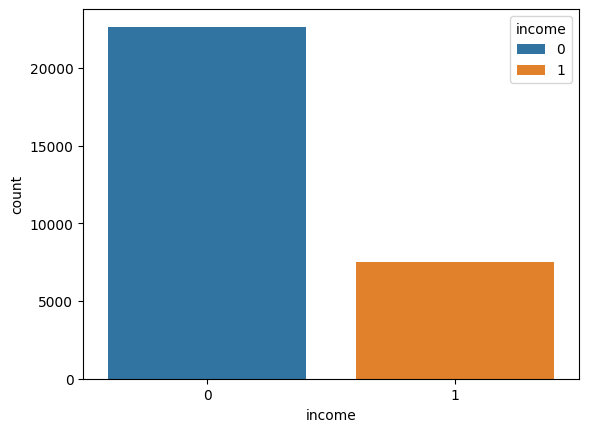

In [168]:
#Visualizamos la distribución
sns.countplot(x = "income", data = df, hue = "income");

Es un dataset desbalanceado, por lo que esto afectará a la hora de escoger la métrica

### Ejercicio 5: Preparar variables categóricas (I)

Prepara las variables categóricas, salvo "education" y "native_country" (o su equivalente si no la has llamado así al connvertirla en binaria), convirtiéndolas con un one-hot encoding (usa el pd.get_dummies). NOTA: Recuerda que este es el dataset de train, por eso lo atacamos directamente.

In [169]:
df = pd.get_dummies(df, columns = [col for col in columna_str if col != "education" and col  != "income"], dtype= "int")
df

,age,education,education_num,capital_gain,capital_loss,hours_per_week,income,native_country_bin,workclass_Federal-gov,workclass_Local-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,Bachelors,13,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,Bachelors,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,HS-grad,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,11th,7,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,Bachelors,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Assoc-acdm,12,0,0,38,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,40,HS-grad,9,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,58,HS-grad,9,0,0,40,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,22,HS-grad,9,0,0,20,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


### Ejercicio 6: Preparar variables categóricas (II)

Codifica la variable "education" usando un ordinal encoding, no uses la codificación por defecto, elígela tú y razónala o bien demuestra pillería y que has revisado el dataset.

In [170]:
#Definimos las etiquetas para que se asignen los valores en orden
categorias = [[
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",
    "Assoc-voc",
    "Assoc-acdm",
    "Bachelors",
    "Masters",
    "Prof-school",
    "Doctorate"
]]

coder = OrdinalEncoder(categories= categorias)
df["education"] = coder.fit_transform(df[["education"]], coder)
df

,age,education,education_num,capital_gain,capital_loss,hours_per_week,income,native_country_bin,workclass_Federal-gov,workclass_Local-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,39,12.0,13,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,12.0,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,8.0,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,6.0,7,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,12.0,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,11.0,12,0,0,38,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,40,8.0,9,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,58,8.0,9,0,0,40,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,22,8.0,9,0,0,20,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


Aunque se podría usar la columna "education" con la codificación asignada anteriormente, en el DataFrame ya existe la columna "education_num" que nos aporta esta información, por lo que eliminamos la columna "education"

In [171]:
df.drop("education", axis = 1, inplace = True)
df["education_num"].value_counts()

education_num
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: count, dtype: int64

NOTA: En un ejercicio completo deberíamos decidir si escalar las variables numéricas contínuas, si quieres puedes hacero tú como extra y comparar con el modelo que vamos a completar en este conjunto de ejercicios.

### Ejercicio 7: Modelo (I)

Instancia el modelo de regresión logística, con el hiperparámetro "max_iter" a 10000.

In [172]:
log_class = LogisticRegression(max_iter = 10000)

### Ejercicio 8: Entrenamiento

Entrena modelo para el dataset de train tal como lo hemos preparado, creando antes el dataset sólo de features (X_train) y la serie con los valores del target (y_train). NOTA: Deshazte de "education_num" si has codificado tú a mano "education".

In [173]:
#Creamos los DataFrame X e y
X_train = df.drop("income", axis = 1)
y_train = df["income"]

#Entrenamos el modelo
log_class.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Ejercicio 9: Evaluación (I)

Previo a la evaluación necesitamos obtener y preparar el dataset de test. Carga el dataset a partir de "./data/adult.test". Luego aplícale las mismas operaciones que has realizado sobre el train. (NOTA; Puede que tengas que cambiar alguna cosa en la variable "income" para convertirla)

In [174]:
#Cargamos el dataset y definimos las columnas
df_test = pd.read_csv("./data/adult.test", header = None)

df_test.columns = columnas
columna_str_test = df_test.select_dtypes(include = "object").columns.to_list()

#Limpiamos los espacios en blanco de las variables string y eliminamos la columna "fnlwgt"
for columna in columna_str_test:
    df_test[columna] = df_test[columna].str.strip()

df_test.drop("fnlwgt", axis = 1, inplace = True)

#Eliminamos los valores "?"
df_test = df_test.replace('?', np.NaN).dropna()

#Clasificamos a los ciudadanos norteamericanos
df_test["native_country_bin"] = df_test["native_country"].apply(clasifica_norteamericano)

#Eliminamos la columna original del DataFrame y de la lista con las columnas string
df_test.drop(columns=["native_country"], inplace=True)
columna_str_test.remove("native_country")

#Realizamos la conversión a números del target
df_test["income"] = df_test["income"].str.replace(">50K.","1").replace("<=50K.","0").astype(int)

#Preparamos las variables string excepto "education" y la target
df_test = pd.get_dummies(df_test, columns = [col for col in columna_str_test if col != "education" and col  != "income"], dtype= "int")

#Eliminamos la columna "education" y nos quedamos con "num_educacion" en su lugar
df_test.drop("education", axis = 1, inplace = True)

#Creamos los DataFrames X e y de test
X_test = df_test.drop("income", axis = 1)
y_test = df_test["income"]

### Ejercicio 10: Evaluación (II)

Obten la predicción para X_train y para X_test.

In [175]:
pred_train = log_class.predict(X_train)
pred_test = log_class.predict(X_test)

### Ejercicio 11: Evaluación (III)

Muestra la matriz de confusión para los resultados de train, así como el clasification_report de sklearn

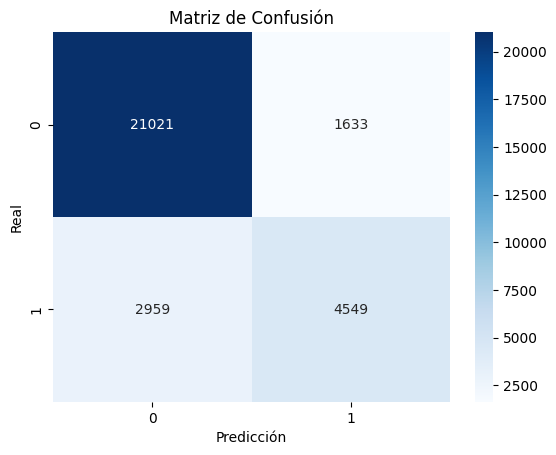

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22654
           1       0.74      0.61      0.66      7508

    accuracy                           0.85     30162
   macro avg       0.81      0.77      0.78     30162
weighted avg       0.84      0.85      0.84     30162



In [184]:
#Calculamos la matriz de confusión y la visualizamos
conf_matrix_train = confusion_matrix(y_train, pred_train)

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#Generamos el informe de clasificación
print(classification_report(y_train, pred_train))

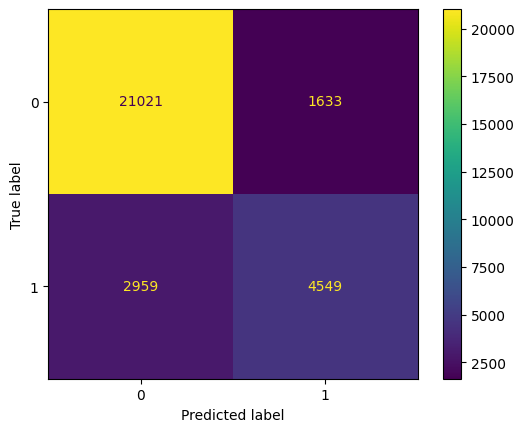

In [185]:
# ALTERNATIVA: Usando métodos de sklearn
ConfusionMatrixDisplay.from_predictions(y_train, pred_train);

### Ejercicio 12: Evaluación (IV)
Muestra la matriz de confusión y el classification report para los resultados del test. Comparála con los de train.

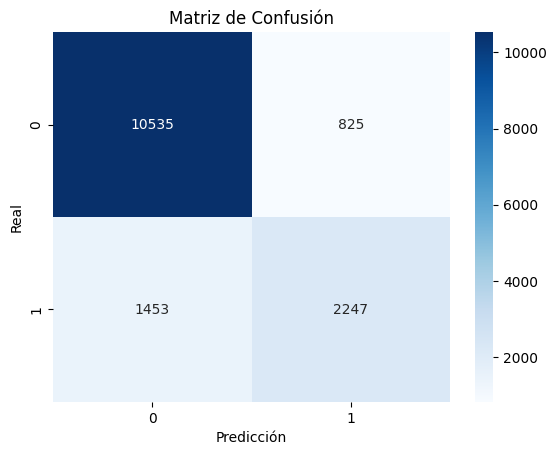

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.61      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [187]:
#Calculamos la matriz de confusión y la visualizamos
conf_matrix_test = confusion_matrix(y_test, pred_test)

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#Generamos el informe de clasificación
print(classification_report(y_test, pred_test))

Detecta mejor la clase 0 (era de esperar ya que es muy superior a la clase 1 en proporción), pero muestra buenas métricas para la clase 1. Además la generalización es muy buena

### Extra: 

1. Muestra la curva ROC de test.

2. Muestra los coeficientes y su importancia.

El AUROC es: 0.90


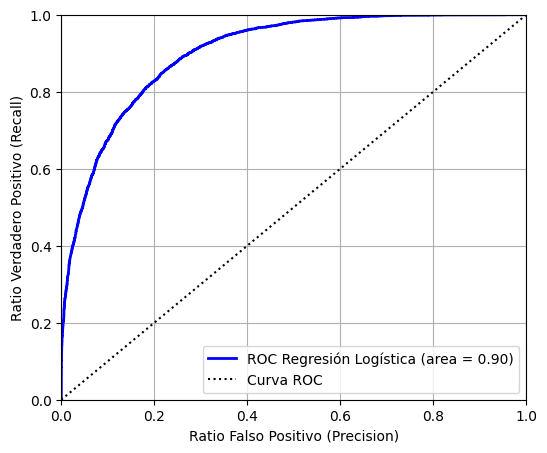

In [201]:
#Calculamos los valores de la curva
scores = log_class.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)

#Mostramos el AUROC
print("El AUROC es: %.2f" %(roc_auc))

#Mostramos la curva ROC
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Regresión Logística (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC")

#Definimos los ejes X y Y
plt.xlabel("Ratio Falso Positivo (Precision)")
plt.ylabel("Ratio Verdadero Positivo (Recall)")

#Mostramos la rejilla, acotamos los ejes y mostramos la leyenda
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=10);

El modelo presenta un AuROC = 0.9, que es muy bueno

,Coeficientes
age,0.022186
education_num,0.265216
capital_gain,0.000314
capital_loss,0.000637
hours_per_week,0.026482
native_country_bin,0.073436
workclass_Federal-gov,0.049633
workclass_Local-gov,-0.659551
workclass_Private,-0.445635
workclass_Self-emp-inc,-0.297389


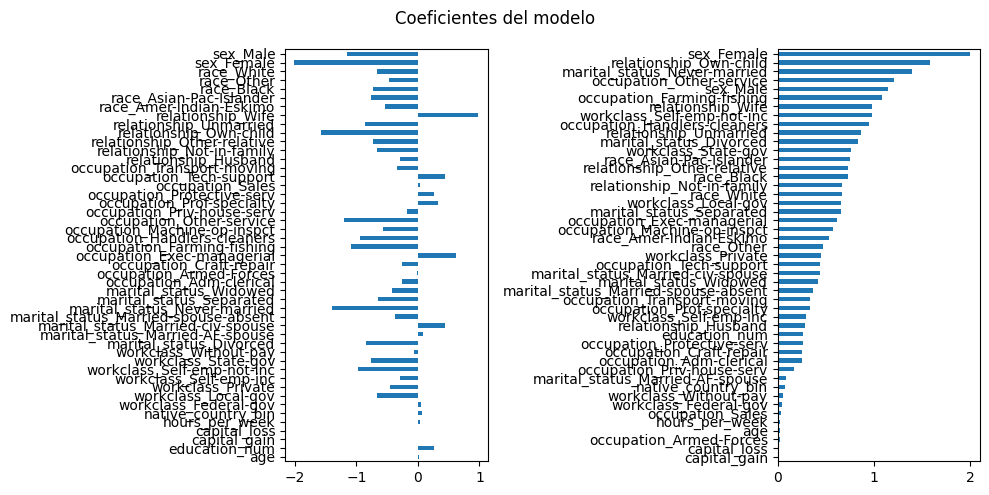

In [202]:
#Mostramos los coeficientes ordenados
def muestra_coeficientes(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["Coeficientes"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="Coeficientes").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Coeficientes del modelo")

    fig.tight_layout()

    return df_coef

muestra_coeficientes(log_class)